In [5]:
import requests
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

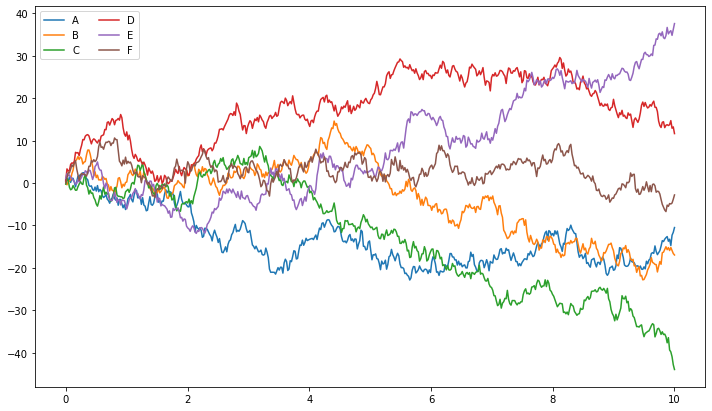

In [9]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [15]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [16]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-07-21 06:33:58.088620')

In [19]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [21]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [22]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-21 07:00:00,22950.02,22968.42,22763.70,22788.83,51.986871,1.188130e+06
2022-07-21 08:00:00,22788.30,23103.10,22783.39,22932.70,76.240369,1.749856e+06
2022-07-21 09:00:00,22940.05,22953.82,22809.87,22850.73,70.507107,1.612437e+06
2022-07-21 10:00:00,22868.39,23008.44,22851.94,22997.57,57.492153,1.320407e+06
2022-07-21 11:00:00,22997.57,23067.67,22865.05,22865.05,149.882873,3.441434e+06


<AxesSubplot:xlabel='CloseTime'>

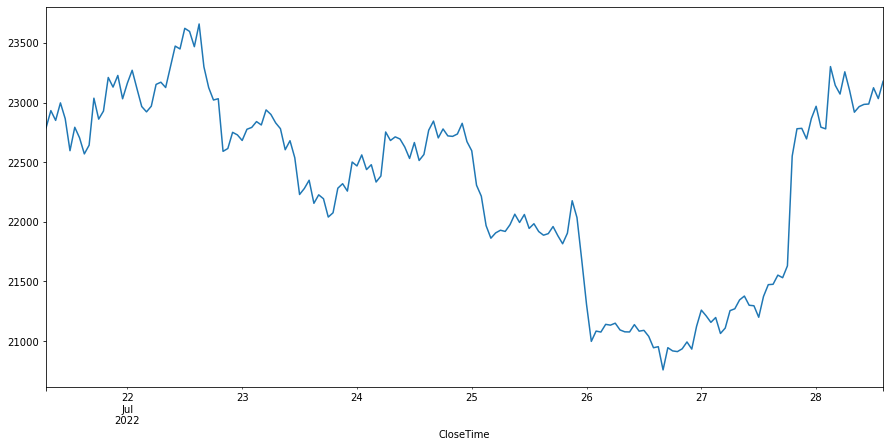

In [23]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [24]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [25]:
output_notebook()

Loading BokehJS ...

In [26]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [27]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [28]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [29]:
eth.to_excel(writer, sheet_name='Ether')

In [30]:
writer.save()